In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


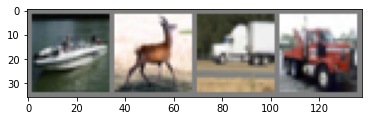

 ship  deer truck truck


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


50000

In [11]:
for epoch in range(30):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.231
[1,  4000] loss: 1.899
[1,  6000] loss: 1.712
[1,  8000] loss: 1.578
[1, 10000] loss: 1.529
[1, 12000] loss: 1.491
[2,  2000] loss: 1.412
[2,  4000] loss: 1.389
[2,  6000] loss: 1.356
[2,  8000] loss: 1.336
[2, 10000] loss: 1.292
[2, 12000] loss: 1.307
[3,  2000] loss: 1.236
[3,  4000] loss: 1.222
[3,  6000] loss: 1.205
[3,  8000] loss: 1.207
[3, 10000] loss: 1.201
[3, 12000] loss: 1.180
[4,  2000] loss: 1.101
[4,  4000] loss: 1.111
[4,  6000] loss: 1.135
[4,  8000] loss: 1.100
[4, 10000] loss: 1.089
[4, 12000] loss: 1.113
[5,  2000] loss: 1.018
[5,  4000] loss: 1.043
[5,  6000] loss: 1.043
[5,  8000] loss: 1.059
[5, 10000] loss: 1.027
[5, 12000] loss: 1.039
[6,  2000] loss: 0.967
[6,  4000] loss: 0.978
[6,  6000] loss: 0.968
[6,  8000] loss: 0.999
[6, 10000] loss: 0.976
[6, 12000] loss: 1.015
[7,  2000] loss: 0.904
[7,  4000] loss: 0.915
[7,  6000] loss: 0.954
[7,  8000] loss: 0.933
[7, 10000] loss: 0.977
[7, 12000] loss: 0.959
[8,  2000] loss: 0.862
[8,  4000] 

In [12]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [12]:
#net = Net()
#net.load_state_dict(torch.load(PATH)) 모델을 불러오는 것

In [13]:
outputs = net(images)

In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 56 %
Accuracy of   car : 78 %
Accuracy of  bird : 41 %
Accuracy of   cat : 41 %
Accuracy of  deer : 55 %
Accuracy of   dog : 41 %
Accuracy of  frog : 70 %
Accuracy of horse : 67 %
Accuracy of  ship : 74 %
Accuracy of truck : 67 %
